Credit card companies need to effectively identify fraudulent transactions to prevent customers from being wrongly charged. This dataset, sourced from Kaggle, includes transactions made by European cardholders in September 2013. Over a span of two days, it records 492 frauds out of 284,807 transactions, highlighting a significant imbalance with frauds representing just 0.172% of the total transactions.

Features:

Numerical input variables: Derived from PCA transformation.
Time: Seconds elapsed between each transaction and the first transaction.
Amount: Transaction amount, useful for cost-sensitive learning.

Target:
Class: Response variable indicating fraud (1) or non-fraud (0).

Source:
The dataset was collected and analyzed by Worldline and the Machine Learning Group (MLG) at Université Libre de Bruxelles (ULB) as part of a research collaboration on big data mining and fraud detection.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/ML-Assignments/Anamaly Detection/creditcard.csv')

In [4]:
df.head(2) #display first two rows of dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [5]:
df.info() #Summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
print('Shape Of The Dataset', df.shape)
print('Class Categories', df['Class'].unique())
print('Number Of Records With The Class Value 0(Non-Fraudulent): ', (df.Class == 0).sum())
print('Number Of Records With The Class Value 1(Fraudulent): ', (df.Class == 1).sum())

Shape Of The Dataset (284807, 31)
Class Categories [0 1]
Number Of Records With The Class Value 0(Non-Fraudulent):  284315
Number Of Records With The Class Value 1(Fraudulent):  492


<Axes: xlabel='Class', ylabel='count'>

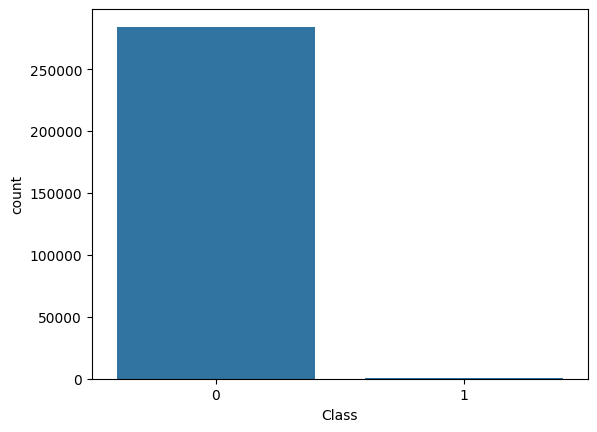

In [7]:
sns.countplot(x='Class', data=df)

This is a highly imbalanced because occurrences of fraud are rare compared to normal transactions. We will explore effective strategies for handling the imbalance in the dataset.

<Axes: title={'center': 'Correlation Of Features With Target Variable'}>

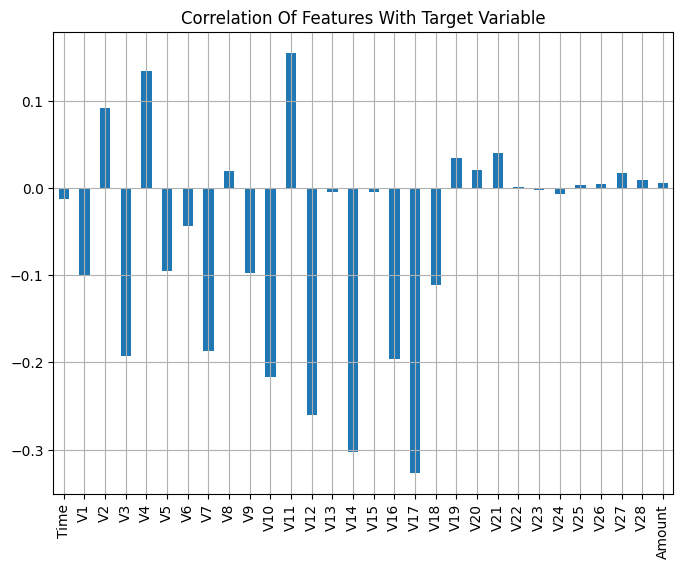

In [8]:
#Features Selection
# Correlation between the 'Class' column and the first 30 columns
x = df.corr()['Class'][:30]
x.plot.bar(figsize=(8, 6), title="Correlation Of Features With Target Variable", grid=True)

Some features have a negligible correlation with the target variable, these can be removed.

<Axes: >

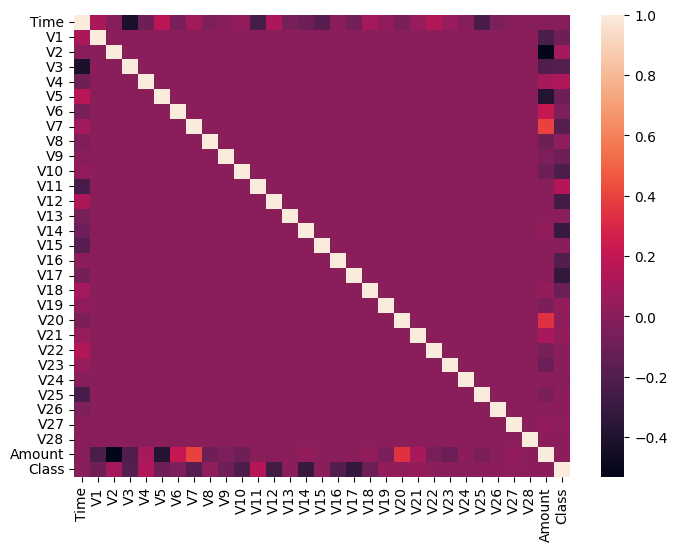

In [11]:
#Inter-Correlation among variables
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr())

Only intercorrelated variable among others is the transaction Amount, however this shows no correlation with the target variable - class. So this too can be removed.

In [13]:
y = df.corr()['Class']
df2 = df.copy()
# Iterate through columns and drop those with absolute correlation less than 0.13
for i in df.columns:
    if abs(y[i]) < 0.13:
        df2.drop(columns=[i], inplace=True)

**Feature Selection** is done here where we filter our dataset to keep only features with a correlation above 0.13. So here we get 9 columns selected.

In [15]:
df2.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


<Axes: >

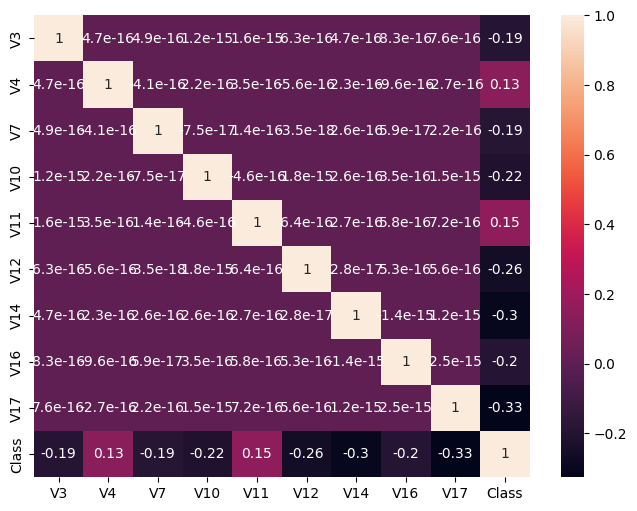

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df2.corr(), annot=True)

<Axes: title={'center': 'Corrleation between Top Features & Target Variable'}>

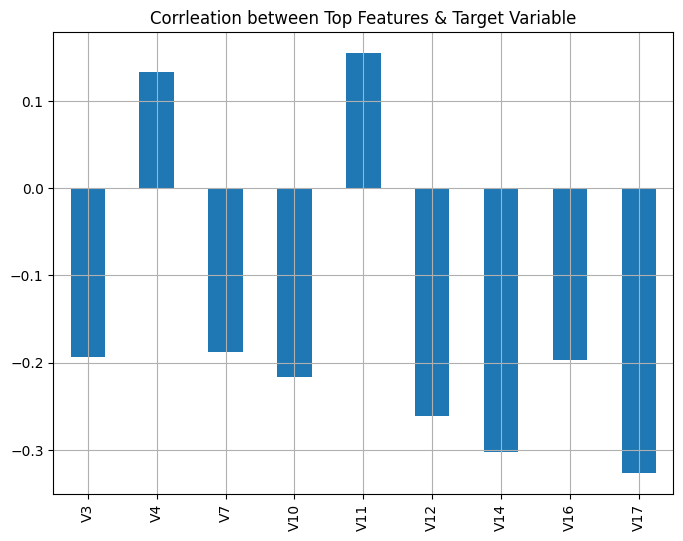

In [17]:
x = df2.corr()['Class'][:9]
x.plot.bar(figsize=(8, 6), title="Corrleation between Top Features & Target Variable", grid=True)

**Handling Data Imbalanced**

Dataset consists of:
No. of rows with class value 0: 284,315
No. of rows with class value 1: 492

Majority of records are non-fraudulent (class 0), accounting for over 99% of the dataset.

Models trained on such imbalanced data might achieve high accuracy by focusing on the majority class while failing to detect fraudulent transactions effectively.

Downsampling Strategy:

Downsampling involves randomly reducing the number of samples in the majority class to balance it with the minority class. This technique helps mitigate biases towards the majority class while preserving the overall dataset integrity.

By aligning the number of samples in the majority class with the minority class, downsampling promotes equal learning from both classes, enhancing the model's capability to detect fraudulent transactions accurately.

In [18]:
from imblearn.under_sampling import RandomUnderSampler
X = df2.drop('Class', axis=1)
y = df2['Class']
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)
downsampled_df.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,-0.666593,0.716564,0.388881,-0.597739,-0.325347,-0.216435,-1.054631,0.601226,0.631117,0
1,0.904547,0.694584,0.495236,0.170547,0.821998,0.468322,0.573006,-0.011633,-0.504570,0
2,1.122074,-1.308725,-0.701304,2.051312,0.575866,-0.594037,-0.338340,-0.756390,0.535141,0
3,-0.987421,-0.029567,0.775644,-1.238598,-0.841133,-0.586472,-0.436671,0.266437,0.703234,0
4,0.269272,3.866438,-0.721945,1.166335,1.297531,-1.920966,1.323225,1.317655,-0.441076,0


In [19]:
downsampled_df.shape

(984, 10)

<Axes: xlabel='Class', ylabel='count'>

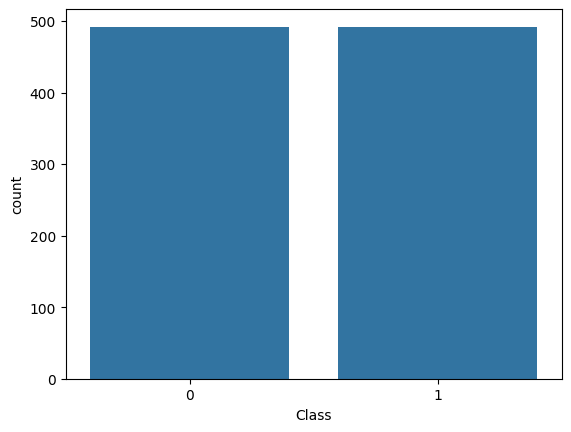

In [20]:
sns.countplot(x='Class', data=downsampled_df)

In [24]:
!pip install lazypredict

In [25]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

x = downsampled_df.drop(columns= 'Class')
y = downsampled_df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 14.85it/s]

[LightGBM] [Info] Number of positive: 394, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 787, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500635 -> initscore=0.002541
[LightGBM] [Info] Start training from score 0.002541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.94,0.94,0.94,0.94,0.09
LabelPropagation,0.94,0.94,0.94,0.94,0.07
XGBClassifier,0.93,0.93,0.93,0.93,0.17
LGBMClassifier,0.93,0.93,0.93,0.93,0.22
ExtraTreesClassifier,0.93,0.93,0.93,0.93,0.19
BaggingClassifier,0.93,0.93,0.93,0.93,0.08
RandomForestClassifier,0.92,0.92,0.92,0.92,0.30
Perceptron,0.92,0.92,0.92,0.92,0.02
KNeighborsClassifier,0.92,0.92,0.92,0.92,0.03


**Ensemble Method to improve accuracy**

Ensemble learning involves combines the predictions from multiple models using a voting mechanism.
In this case, it is using 'hard' voting, which means the final prediction is the majority vote among the individual models.

In [26]:
#Ensemble Learning

from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = downsampled_df.drop(columns='Class')
y = downsampled_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

label_spreading = LabelSpreading()
label_propagation = LabelPropagation()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

#Ensemble Learning
ensemble = VotingClassifier(estimators=[
    ('label_spreading', label_spreading),
    ('label_propagation', label_propagation),
    ('xgb', xgb)
], voting='hard')



ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[97  2]
 [ 5 93]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.98      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



Here we can find that accuracy has improved by Ensemble Learning to 96%.

**Hyperparameter Tuning with GridSearchCV**

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
X = downsampled_df.drop(columns='Class')
y = downsampled_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Initialize the models
label_spreading = LabelSpreading()
label_propagation = LabelPropagation()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [31]:
# Create an ensemble
ensemble = VotingClassifier(estimators=[
    ('label_spreading', label_spreading),
    ('label_propagation', label_propagation),
    ('xgb', xgb)
], voting='hard')

GridSearchCV: Performs an exhaustive search over the specified parameter grid using cross-validation.

In [32]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'label_spreading__gamma': [0.1, 0.5, 1.0, 5.0, 10.0],
    'label_propagation__gamma': [0.1, 0.5, 1.0, 5.0, 10.0],
    'xgb__n_estimators': [50, 100, 150],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

# Perform grid search
grid_search = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [33]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [36]:
print("Best Parameters:", best_params)
print("\nCross-Validation Score:", best_score)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'label_propagation__gamma': 0.1, 'label_spreading__gamma': 10.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

Cross-Validation Score: 0.9352015789626448

Confusion Matrix:
[[99  0]
 [ 8 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.92      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



Minimizing False Negatives

In credit card fraud detection, reducing false negatives (fraudulent transactions marked as non-fraudulent) is crucial. Misclassifying fraud can lead to significant financial losses and damage trust in the system. Therefore, it's essential to balance high accuracy with a low number of false negatives to ensure effective fraud detection.

The ensemble uses soft voting, which means it averages the probabilities predicted by each model rather than making a majority vote. This provides more nuanced probability estimates.

By default, a probability threshold of 0.5 is used to classify transactions as fraudulent (1) or non-fraudulent (0). By lowering the threshold to 0.27, more transactions are classified as fraudulent.

In [49]:
label_spreading = LabelSpreading()
label_propagation = LabelPropagation()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

ensemble = VotingClassifier(estimators=[
    ('label_spreading', label_spreading),
    ('label_propagation', label_propagation),
    ('xgb', xgb)
], voting='soft')  #soft voting for probability output

ensemble.fit(X_train, y_train)

y_prob = ensemble.predict_proba(X_test)[:, 1]
threshold = 0.27  # threshold
y_pred_adjusted = (y_prob >= threshold).astype(int)
print("Confusion Matrix with Adjusted Threshold:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("\nClassification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

Confusion Matrix with Adjusted Threshold:
[[96  3]
 [ 3 95]]

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        99
           1       0.97      0.97      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



**Impact**
Reducing False Negatives: Lowering the threshold means the model is more sensitive to potential fraud, increasing the chances of correctly identifying fraudulent transactions.

Balancing Accuracy: While this may increase the number of false positives (non-fraudulent transactions marked as fraudulent), it helps ensure that fewer fraudulent transactions are missed, which is crucial in fraud detection.

By carefully choosing and adjusting the threshold, the model can better balance high accuracy with minimizing false negatives, thereby improving its overall effectiveness in detecting fraud.